In [23]:
import pandas as pd
import numpy as np
import matplotlib as mp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
import seaborn as sns

In [25]:
df = pd.read_csv("Car_price.csv")
df

,CarModel,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [26]:
groups = df.groupby("CarModel")

In [27]:
bmw = groups.get_group("BMW X5")
audi = groups.get_group("Audi A5")
benz = groups.get_group("Mercedez Benz C class")
bmw

,CarModel,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


<AxesSubplot:xlabel='Age(yrs)'>

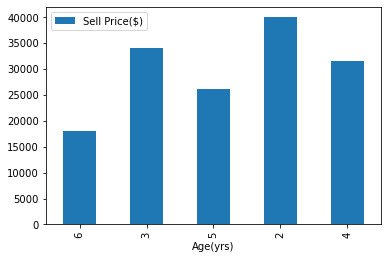

In [28]:
#Age vs Price of BMW

bmw.plot.bar(x = "Age(yrs)",y="Sell Price($)")


<AxesSubplot:xlabel='Age(yrs)'>

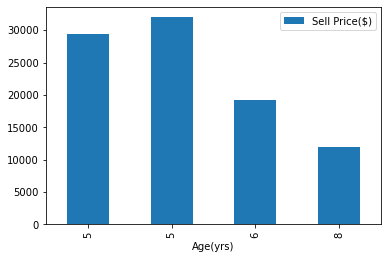

In [29]:
#Age vs Price of AUDI

audi.plot.bar(x = "Age(yrs)",y="Sell Price($)")

<AxesSubplot:xlabel='Age(yrs)'>

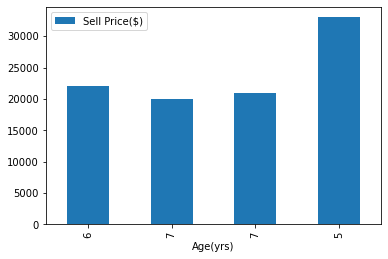

In [30]:
#Age vs Price of Mercedes

benz.plot.bar(x = "Age(yrs)",y="Sell Price($)")

In [31]:
le = LabelEncoder()

dfle = df

In [32]:
dfle.CarModel = le.fit_transform(dfle.CarModel)

dfle

,CarModel,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [33]:
dfle.corr()

,CarModel,Mileage,Sell Price($),Age(yrs)
CarModel,1.000000,0.074476,0.042081,0.061762
Mileage,0.074476,1.000000,-0.927116,0.993452
Sell Price($),0.042081,-0.927116,1.000000,-0.921741
Age(yrs),0.061762,0.993452,-0.921741,1.000000


<AxesSubplot:>

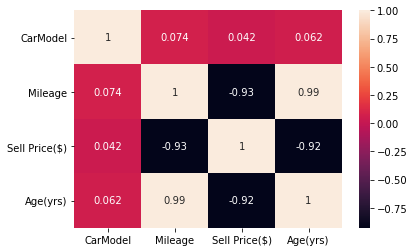

In [34]:
sns.heatmap(dfle.corr(),annot = True)

In [35]:
#

x = dfle[["CarModel","Mileage","Age(yrs)"]].values

y = dfle[["Sell Price($)"]]

In [36]:
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],
    remainder='passthrough' 
)
x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [37]:
#Droping the first column
x = x[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [38]:
model = LinearRegression()

In [39]:
model.fit(x,y)

LinearRegression()

In [20]:
#Coefficient
print(model.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [17]:
#Accuracy

print(model.score(x,y)*100)

NameError: name 'model' is not defined

In [128]:
#Price of mercedes benze that is 4 years old and mileage 45000

p = model.predict([[1,0,86000,7]])

print("The Price of the car would be:",p[0][0])

The Price of the car would be: 11080.743132185155
